# Relatório de Analise VII

## Identificando Outliers

In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [45]:
plt.rc('figure', figsize = (14,6))

<AxesSubplot:>

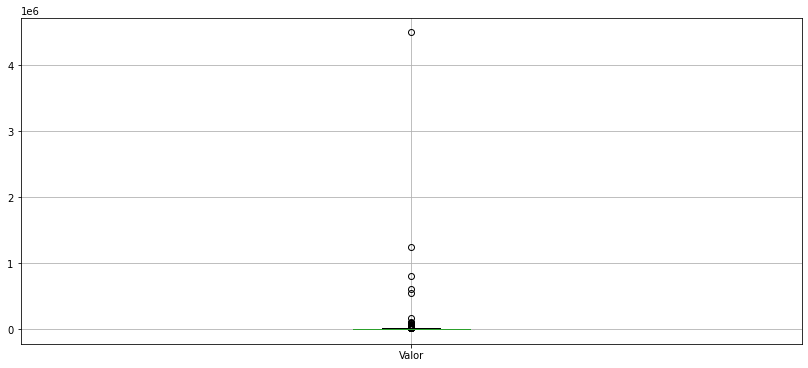

In [46]:
dados.boxplot(['Valor'])

In [47]:
valor = dados['Valor']

In [48]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [50]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [51]:
dados_new = dados[selecao]

<AxesSubplot:>

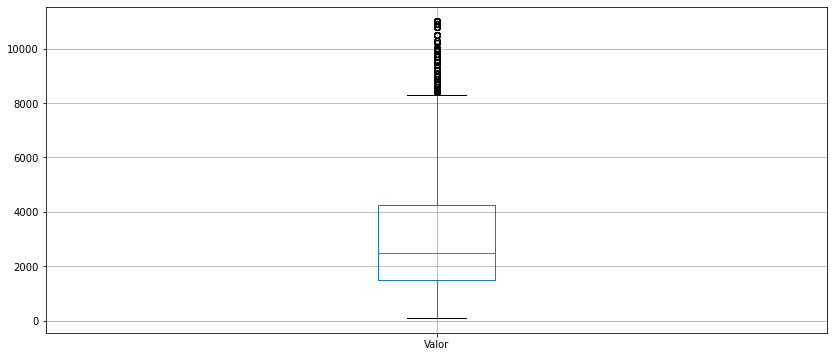

In [52]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

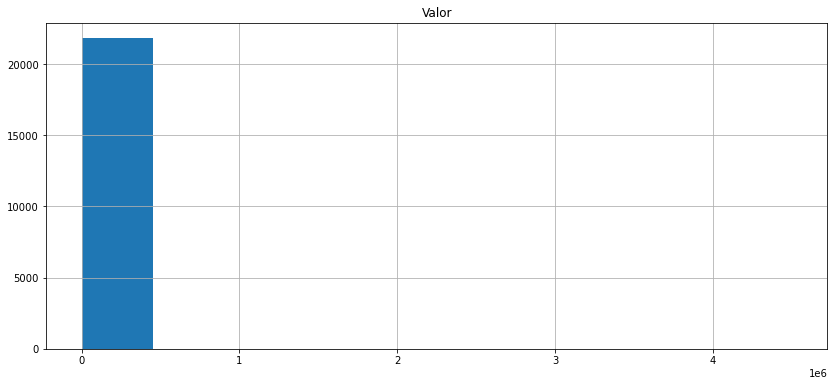

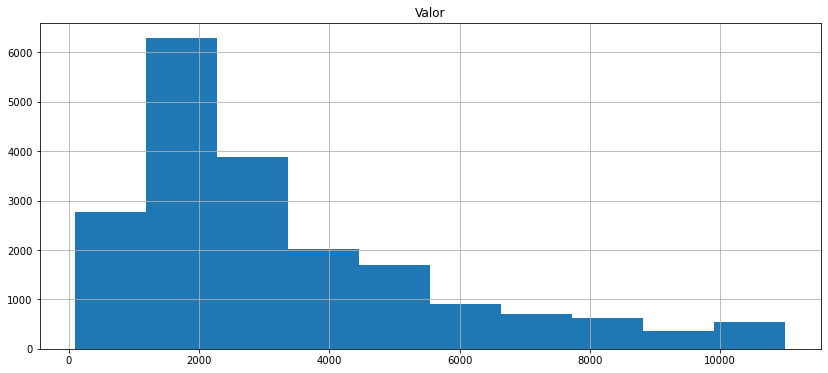

In [53]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e removendo outliers

In [57]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [58]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [63]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_intervalo = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = (eh_tipo) & (eh_dentro_intervalo)
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

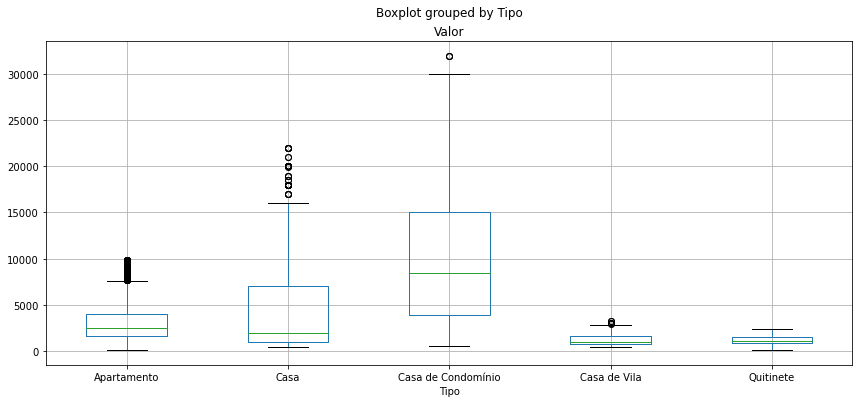

In [66]:
dados_new.boxplot('Valor', by = 'Tipo')